In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Drop the 'Id' column if present
df = df.drop(columns=['Id'], errors='ignore')


In [6]:
# Extract features and target
X = df.iloc[:, :-1]  # Select feature columns
y = df.iloc[:, -1]   # Select target column


In [7]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [9]:
# Create a DataFrame with reduced components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Target'] = y

###  A 2D dataset and a scatter plot showing PCA-transformed data. 

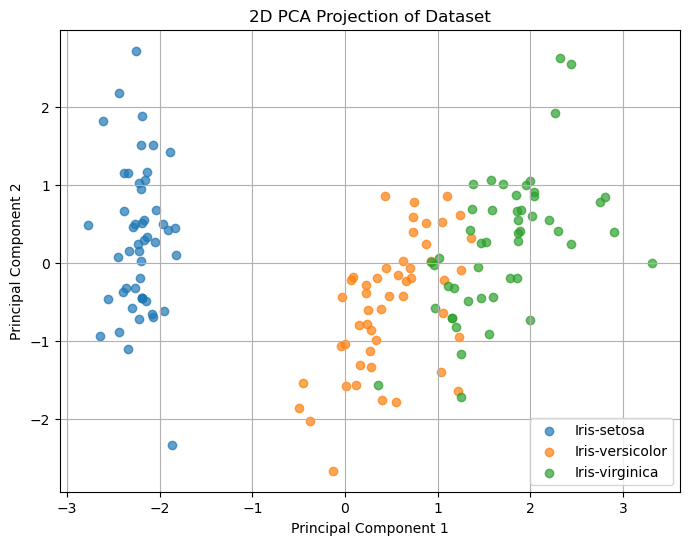

In [11]:
# Scatter plot of the PCA reduced data
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
labels = pca_df['Target'].unique()
for color, label in zip(colors, labels):
    subset = pca_df[pca_df['Target'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection of Dataset')
plt.legend()
plt.grid()
plt.show()


In [12]:
# Print the reduced dataset
print(pca_df.head())


        PC1       PC2       Target
0 -2.264542  0.505704  Iris-setosa
1 -2.086426 -0.655405  Iris-setosa
2 -2.367950 -0.318477  Iris-setosa
3 -2.304197 -0.575368  Iris-setosa
4 -2.388777  0.674767  Iris-setosa
